# Plot the pearson correlation of the MTS R code and the Python Code

In [5]:
1+1

2

In [6]:
import pandas as pd
import glob
import os
import sys
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [7]:
# Load all of the MTS R code results
model_files = glob.glob("/scratch/users/nphill22/projects/corsello_lab/20240313_prism_final_reruns/new_baseline/output/*/Model_table.csv")

# read all model files
model_dfs = []
for f in tqdm(model_files):
    drug_name = os.path.basename(os.path.dirname(f))
    df = pd.read_csv(f)
    df["Drug"] = drug_name
    model_dfs.append(df)

mts_df = pd.concat(model_dfs)
# get only "all" rows
mts_df = mts_df.loc[mts_df["model"] == "all", :]

100%|██████████| 6512/6512 [00:08<00:00, 734.54it/s]


In [8]:
# load all of the baseline python results
baseline_files = glob.glob("/scratch/users/nphill22/projects/corsello_lab/20240313_prism_final_reruns/new_baseline/python_rf_output/*/train_corr.txt")

base_df = []
for f in tqdm(baseline_files):
    drug_name = os.path.basename(os.path.dirname(f))
    with open(f, "r") as f:
        line = f.readline().strip()
        base_df.append({"Drug": drug_name, "train_corr": float(line)})

base_df = pd.DataFrame(base_df)
# rename "train_corr" to "python_baseline"
base_df = base_df.rename(columns={"train_corr": "python_baseline"})

100%|██████████| 6512/6512 [00:02<00:00, 2357.11it/s]


In [9]:
# load all of the automl baseline results
automl_files = glob.glob("/scratch/users/nphill22/projects/corsello_lab/20240424_automl_workflow/output/baseline_automl/*/train_corr.txt")

auto_df = []
for f in tqdm(automl_files):
    drug_name = os.path.basename(os.path.dirname(f))
    with open(f, "r") as f:
        line = f.readline().strip()
        auto_df.append({"Drug": drug_name, "train_corr": float(line)})

auto_df = pd.DataFrame(auto_df)
# rename "train_corr" to "python_baseline"
auto_df = auto_df.rename(columns={"train_corr": "python_automl"})

100%|██████████| 6373/6373 [00:02<00:00, 2395.43it/s]


In [10]:
# merge
df = pd.merge(mts_df, base_df, on="Drug", how="inner")

In [11]:
df = pd.merge(df, auto_df, on="Drug", how="inner")

In [12]:
df

,MSE,MSE.se,R2,PearsonScore,pert_mfc_id,pert_name,pert_idose,model,Drug,python_baseline,python_automl
0,0.535591,0.034252,0.031246,0.203915,BRD:BRD-K49522529-001-02-9,alfacalcidol,2.530000,all,alfacalcidol_2.53,0.198509,0.182445
1,0.138923,0.010593,0.002905,0.149334,BRD:BRD-K94379058-001-06-8,bml-190,2.500000,all,bml-190_2.5,0.106050,0.106315
2,0.091434,0.006196,-0.065392,0.034882,BRD:BRD-K57427145-001-01-6,ripazepam,2.500000,all,ripazepam_2.5,0.071909,0.094438
3,0.189311,0.016263,-0.077014,-0.030325,BRD:BRD-K80315159-051-02-0,dppe,2.500000,all,dppe_2.5,-0.057629,-0.040811
4,0.290285,0.018736,-0.034425,0.074175,BRD:BRD-K34073885-001-09-3,tanshinone-i,2.540000,all,tanshinone-i_2.54,0.149140,0.121436
...,...,...,...,...,...,...,...,...,...,...,...
6494,0.096832,0.008312,-0.083503,0.048577,BRD:BRD-K21586122-001-01-9,fimasartan,2.500008,all,fimasartan_2.50000801,0.008153,0.023001
6495,1.106020,0.082285,0.107805,0.325976,BRD:BRD-K24715592-406-02-1,ethacridine-lactate-monohydrate,2.530000,all,ethacridine-lactate-monohydrate_2.53,0.396020,0.381905
6496,0.072736,0.006479,-0.038580,0.071842,BRD:BRD-K53438416-001-01-9,yz9,2.500000,all,yz9_2.5,-0.002044,-0.006483
6497,0.240671,0.017085,0.029977,0.188852,BRD:BRD-K00003370-001-01-9,cadazolid,2.500000,all,cadazolid_2.5,0.164449,0.112625


Text(0, 0.5, 'Python Baseline Pearson Score')

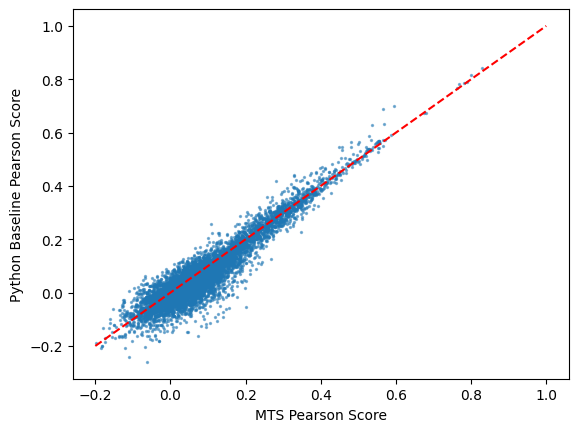

In [13]:
# scatterplot
plt.scatter(df["PearsonScore"], df["python_baseline"], alpha=0.5, s=2) # decrease point size
# plot x = y dotted red line
plt.plot([-.2, 1], [-.2, 1], color="red", linestyle="--")
# add axis labels
plt.xlabel("MTS Pearson Score")
plt.ylabel("Python Baseline Pearson Score")

Text(0, 0.5, 'Python AutoML Pearson Score')

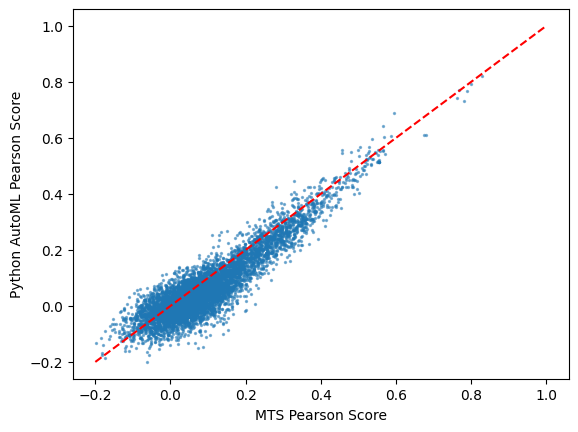

In [14]:
# scatterplot
plt.scatter(df["PearsonScore"], df["python_automl"], alpha=0.5, s=2) # decrease point size
# plot x = y dotted red line
plt.plot([-.2, 1], [-.2, 1], color="red", linestyle="--")
# add axis labels
plt.xlabel("MTS Pearson Score")
plt.ylabel("Python AutoML Pearson Score")


In [15]:
import pandas as pd

In [18]:
# grouping by PearsonScore Decile, get the mean of python_baseline, python_automl, and PearsonScore
df["PearsonScore_decile"] = pd.qcut(df["PearsonScore"], 10, labels=False)

Text(0, 0.5, 'Mean Pearson Score')

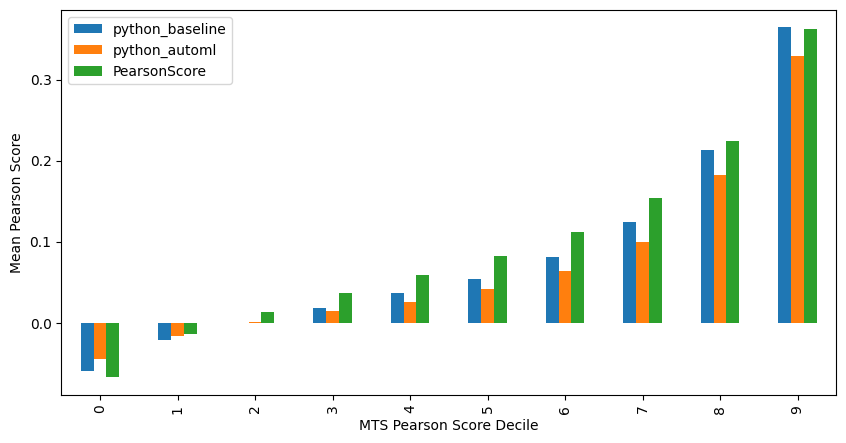

In [23]:
tmp = df.groupby("PearsonScore_decile").agg({"python_baseline": "mean", "python_automl": "mean", "PearsonScore": "mean"})

# plot barplot by decile
tmp.plot(kind="bar", figsize=(10, 5))
plt.xlabel("MTS Pearson Score Decile")
plt.ylabel("Mean Pearson Score")